<a href="https://colab.research.google.com/github/Miguelm-del/analysis-data-py/blob/main/SIGE_Relatorios_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatorios COVID-19 estado de Alagoas

por João Vitor e Miguel Márcio

### relatorios referente ao tema:

- Distribuição por faixa etária:

  - Este relatorio ajuda a entender a relação dos casos de COVID-19 com a faixa etária da população

- Dispersão dos sintomas por casos
- Evolução temporal: Mostrar a evolução dos casos ao longo do tempo.
- Analise dos casos por cidade
- Casos por profissionais de saúde


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
dados = pd.read_csv('./data/part-00000-af9dbba4-9718-4b2b-bbfe-ef4024e867b5.c000(1).csv', delimiter=";", quotechar='"', low_memory=False)
dados2 = pd.read_csv('./data/part-00000-af9dbba4-9718-4b2b-bbfe-ef4024e867b5.c000.csv', delimiter=";", quotechar='"', low_memory=False)
dfCovid = pd.concat([dados, dados2])

df = pd.DataFrame(dfCovid)
display(df)



,sintomas,profissionalSaude,racaCor,outrosSintomas,outrasCondicoes,profissionalSeguranca,cbo,condicoes,sexo,estado,...,codigoResultadoTeste3,codigoEstadoTeste4,codigoTipoTeste4,codigoFabricanteTeste4,codigoResultadoTeste4,dataColetaTeste1,dataColetaTeste2,dataColetaTeste3,dataColetaTeste4,idade
0,"Dispneia, Tosse",Não,Parda,NaN,NaN,Não,NaN,NaN,Masculino,Alagoas,...,NaN,NaN,NaN,NaN,NaN,2022-08-23,NaN,NaN,NaN,NaN
1,"Tosse, Febre, Dor de Garganta, Coriza",Não,Branca,NaN,NaN,Não,NaN,NaN,Feminino,Alagoas,...,NaN,NaN,NaN,NaN,NaN,2021-09-20,NaN,NaN,NaN,41.0
2,"Tosse, Febre, Dor de Garganta, Outros",Não,Branca,"MIALGIA, CONGESTÃO NASAL",NaN,Não,5171 - Bombeiros,NaN,Masculino,Alagoas,...,NaN,NaN,NaN,NaN,NaN,2021-08-13,NaN,NaN,NaN,32.0
3,"Dor de Garganta, Febre",Não,Parda,NaN,NaN,Não,NaN,NaN,Masculino,Alagoas,...,NaN,NaN,NaN,NaN,NaN,2022-01-13,NaN,NaN,NaN,41.0
4,"Coriza, Febre",Não,Parda,NaN,NaN,Não,NaN,NaN,Feminino,Alagoas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320612,"Dor de Cabeça, Dor de Garganta",Não,Parda,NaN,NaN,Não,NaN,NaN,Masculino,Alagoas,...,NaN,NaN,NaN,NaN,NaN,2022-03-08,NaN,NaN,NaN,43.0
320613,Tosse,Não,Preta,NaN,NaN,Não,NaN,NaN,Masculino,Alagoas,...,NaN,NaN,NaN,NaN,NaN,2022-06-23,NaN,NaN,NaN,NaN
320614,"Coriza, Dor de Cabeça, Febre, Dor de Garganta",Não,Amarela,NaN,NaN,Não,NaN,NaN,Feminino,Alagoas,...,NaN,NaN,NaN,NaN,NaN,2022-06-07,NaN,NaN,NaN,47.0
320615,"Coriza, Tosse, Dor de Garganta, Outros",Não,Parda,FRAQUEZA,NaN,Não,NaN,NaN,Masculino,Alagoas,...,NaN,NaN,NaN,NaN,NaN,2022-01-25,2022-01-25,NaN,NaN,46.0


# Distribuição por faixa etária

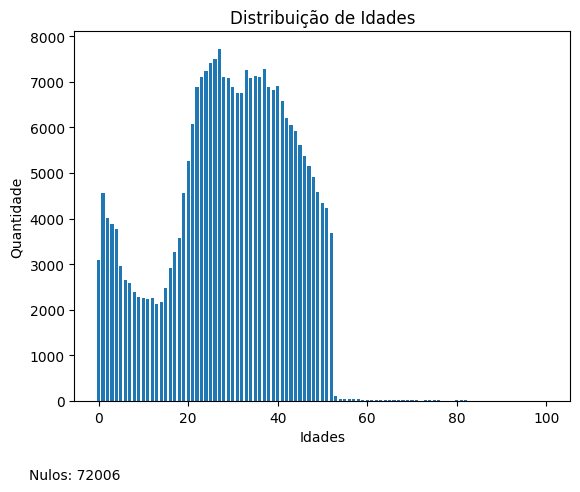

In [3]:
# Fazendo a contagem da quantidade de vezes que cada idade se repete
counting = df['idade'].value_counts()

# Somando quantas vezes os valores NaN apareceu para saber quantas pessoas não foi identificada a idade
nulls = df['idade'].isna().sum()

# Criando uma lista com as idades distintas
different_ages = counting.index.tolist()

# Criando uma lista com as repetições de idade
recurrence = counting.values.tolist()

# Adicionando uma nota sobre valores nulos
obs = "Nulos: " + str(nulls)

# Definindo o tipo de gráfico que será criado e também definimos os valores de x, y e a largura das barras
plt.bar(different_ages, recurrence, 0.7)

plt.title('Distribuição de Idades') # Título do gráfico
plt.xlabel('Idades',) # Título do eixo x
plt.ylabel('Quantidade') # Título do eixo y
plt.annotate(obs, (0, -0.2), xycoords='axes fraction', ha='center', va='center') # Configurações da anotação

plt.show() # Exibição do gráfico

# Relátorio dos casos e sintomas

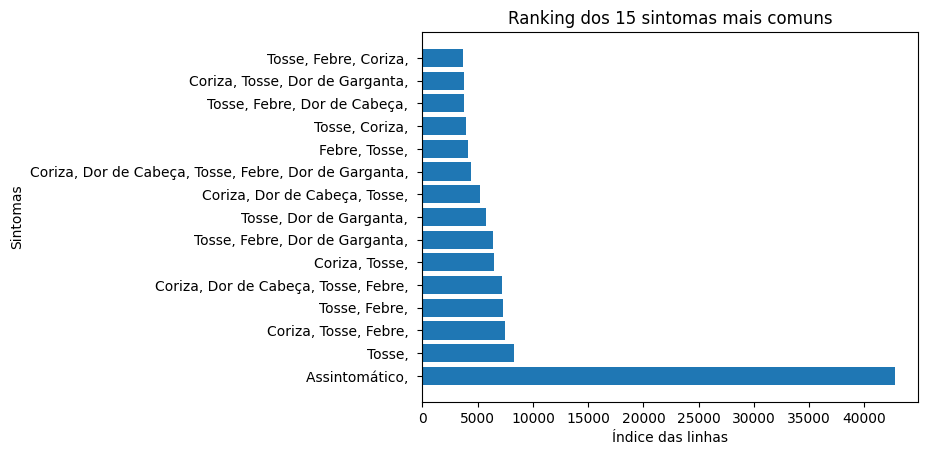

In [4]:
# Concatenar as colunas 'sintomas' e 'outrosSintomas' em uma nova coluna
df['sintomas_combinados'] = df['sintomas'].str.cat(df['outrosSintomas'], sep=', ', na_rep='')

# Contar a ocorrência de cada valor único na coluna 'sintomas_combinados' do DataFrame df.
all_symptom = df['sintomas_combinados'].value_counts()

N = 15 # Top n de sintomas

top_n = all_symptom.head(N) #  Selecionar os N primeiros valores mais frequentes da série all_symptom e armazena-os na variável top_n.

plt.barh(top_n.index, top_n.values) # Gráfico de barras

plt.xlabel("Índice das linhas") # Título do eixo x
plt.ylabel("Sintomas") # Título do eixo y
plt.title(f"Ranking dos {N} sintomas mais comuns") # Título do gráfico

plt.show() # Exibir gráfico de barra

# Evolução temporal: Mostrar a evolução dos casos ao longo do tempo.

/tmp/ipykernel_14954/3394671191.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCovid_2020['mes_notificacao'] = dfCovid_2020['dataNotificacao'].dt.month
/tmp/ipykernel_14954/3394671191.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCovid_2020['mes_sintoma'] = dfCovid_2020['dataInicioSintomas'].dt.month


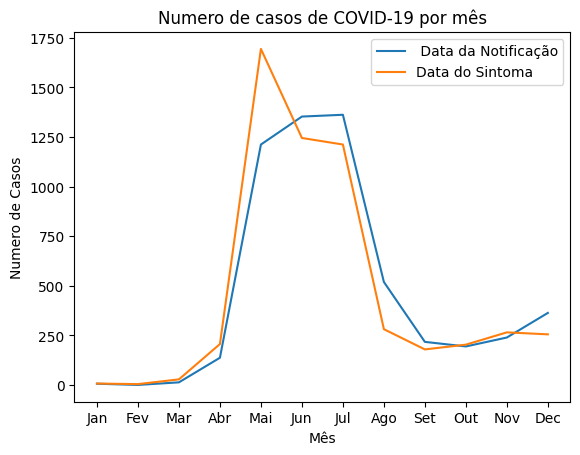

In [5]:
dfCovid['dataNotificacao'] = pd.to_datetime(dfCovid['dataNotificacao']) # Converter a coluna 'dataNotificacao' para o tipo datetime
dfCovid['dataInicioSintomas'] = pd.to_datetime(dfCovid['dataInicioSintomas']) # Converter a coluna 'dataInicioSintomas' para o tipo datetime

# Filtrar o DataFrame dfCovid para manter apenas as linhas com data de notificação em 2020
dfCovid_2020 = dfCovid[dfCovid['dataNotificacao'].dt.year == 2020]

# Extrair o mês da data de notificação e da data de início dos sintomas
dfCovid_2020['mes_notificacao'] = dfCovid_2020['dataNotificacao'].dt.month
dfCovid_2020['mes_sintoma'] = dfCovid_2020['dataInicioSintomas'].dt.month

# Contar casos por mês para a data de notificação
cases_by_month_notification = dfCovid_2020['mes_notificacao'].value_counts().sort_index()

# Contar casos por mês para a data de início dos sintomas
cases_by_month_symptom_onset = dfCovid_2020['mes_sintoma'].value_counts().sort_index()


months = range(1, 13)
cases_by_month_notification = cases_by_month_notification.reindex(months, fill_value=0)
cases_by_month_symptom_onset = cases_by_month_symptom_onset.reindex(months, fill_value=0)


months = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dec'] # Lista com os meses
plt.plot(months, cases_by_month_notification.values, label=' Data da Notificação')  # Gráfico de linha
plt.plot(months, cases_by_month_symptom_onset.values, label='Data do Sintoma') # Gráfico de linha


plt.xlabel('Mês') # Título do eixo x
plt.ylabel('Numero de Casos') # Título do eixo y
plt.title('Numero de casos de COVID-19 por mês') # Titulo do gráfico
plt.legend() # Adiciona a legenda

plt.show() # Exibir gráfico de barra

# Relatorio casos por cidade

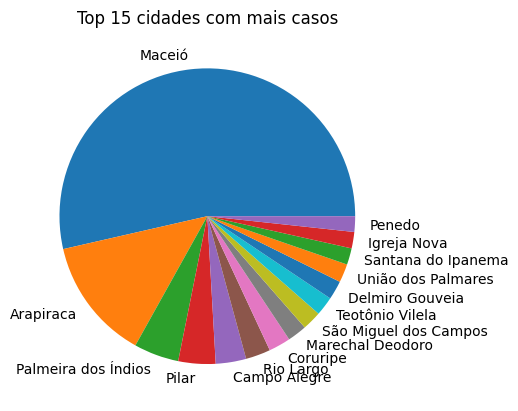

In [6]:
cases_by_city = dfCovid['municipio'].value_counts() # Contar a ocorrência de cada valor único na coluna 'municipio' do DataFrame dfCovid.

N = 15 # Top n de cidades
top_n_city = cases_by_city.head(N) # Selecionar os N primeiros valores mais frequentes da série cases_by_city e armazena-os na variável top_n_city.

plt.pie(top_n_city.values, labels=top_n_city.index) # Gráfico de pizza

plt.title(f"Top {N} cidades com mais casos") # Título do gráfico
plt.show() # Exibir gráfico de pizza


# Profissionais de Saúde infectados por sexo

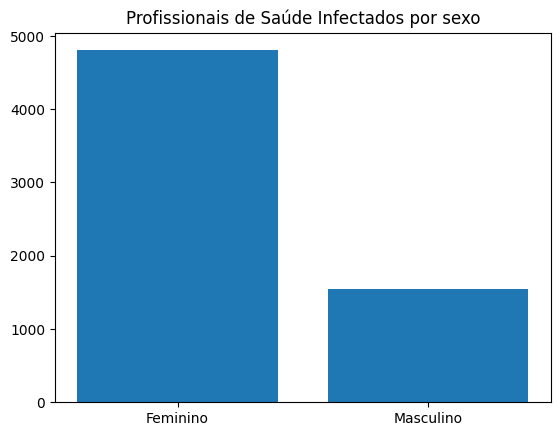

In [7]:
# Filtra todas as pessoas infectadas pelos pessoas que são profissionais de saúde
healthcare_professional = df[df['profissionalSaude'] == 'Sim']

# Agrupa pelo sexo e diz a quantidade de cada
gender = healthcare_professional.groupby('sexo').size()

# Definindo o tipo de gráfico, onde o eixo X é o tipo de sexo e o eixo Y a quantidade
plt.bar(gender.index, gender)

plt.title("Profissionais de Saúde Infectados por sexo") # Título do gráfico

plt.show() # Exibir gráfico de barra